In [1177]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler , RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [1178]:
data = pd.read_csv('raw_data.csv')
data.head()
print(data.shape)

(5980, 14)


In [1179]:
sns.set_theme()

In [1180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5980 non-null   object
 1   car            5980 non-null   object
 2   price          5980 non-null   int64 
 3    origin        5980 non-null   object
 4   condition      5980 non-null   object
 5   carType        5980 non-null   object
 6   km             5980 non-null   object
 7   carColor       5980 non-null   object
 8   interiorColor  5980 non-null   object
 9   carDoor        5980 non-null   object
 10  carSeat        5980 non-null   object
 11  engine         5980 non-null   object
 12  gear           5980 non-null   object
 13  wheelDrive     5980 non-null   object
dtypes: int64(1), object(13)
memory usage: 654.2+ KB


In [1181]:
data.head()

,id,car,price,origin,condition,carType,km,carColor,interiorColor,carDoor,carSeat,engine,gear,wheelDrive
0,Mã: 4367562,Lexus RX 200t - 2016,2490000000,Nhập khẩu,Xe đã dùng,SUV,"40,000 Km",Đỏ,Nâu,5 cửa,5 chỗ,Xăng2.0L,Số tự động,AWD - 4 bánh toàn thời gian
1,Mã: 4394448,Ford Ranger Wildtrak 3.2L 4x4 AT - 2017,825000000,Nhập khẩu,Xe đã dùng,Bán tải / Pickup,0 Km,Đồng,Nâu,4 cửa,5 chỗ,Dầu3.2L,Số tự động,4WD - Dẫn động 4 bánh
2,Mã: 4415173,Ford Ranger XLS 2.2L 4x2 MT - 2022,619000000,Lắp ráp trong nước,Xe mới,Bán tải / Pickup,0 Km,Trắng,Đen,4 cửa,5 chỗ,Dầu2.2L,Số tay,RFD - Dẫn động cầu sau
3,Mã: 4304737,Mercedes Benz E class E250 - 2017,1660000000,Lắp ráp trong nước,Xe đã dùng,Sedan,"48,000 Km",Đen,Đen,4 cửa,5 chỗ,Xăng2.0L,Số tự động,RFD - Dẫn động cầu sau
4,Mã: 3993944,Hyundai Accent 1.4 AT - 2021,500000000,Lắp ráp trong nước,Xe mới,Sedan,0 Km,Trắng,-,4 cửa,5 chỗ,Xăng1.4L,Số tự động,FWD - Dẫn động cầu trước


Dataset gồm có 14 cột:

- id: Mã xe                                 
- car: Tên xe                              
- price: Giá tiền
- origin: Nguồn gốc     
- condition: Tình trạng xe                   
- carType: Các loại xe                       
- km: Số Km đã đi được                     
- carColor: Màu xe                         
- interiorColor: Màu nội thất 
- carDoor: Số cửa
- carSeat: Số chỗ ngồi
- engine: Động cơ
- gear: Hộp số
- wheelDrive: Hệ dẫn động


## Loại bỏ các giá trị id bị trùng lặp :


In [1182]:
data['id'] = data['id'].apply(lambda x : x.strip(' Mã: ').replace(' ', ''))
data=data.drop_duplicates(['id'])
data

,id,car,price,origin,condition,carType,km,carColor,interiorColor,carDoor,carSeat,engine,gear,wheelDrive
0,4367562,Lexus RX 200t - 2016,2490000000,Nhập khẩu,Xe đã dùng,SUV,"40,000 Km",Đỏ,Nâu,5 cửa,5 chỗ,Xăng2.0L,Số tự động,AWD - 4 bánh toàn thời gian
1,4394448,Ford Ranger Wildtrak 3.2L 4x4 AT - 2017,825000000,Nhập khẩu,Xe đã dùng,Bán tải / Pickup,0 Km,Đồng,Nâu,4 cửa,5 chỗ,Dầu3.2L,Số tự động,4WD - Dẫn động 4 bánh
2,4415173,Ford Ranger XLS 2.2L 4x2 MT - 2022,619000000,Lắp ráp trong nước,Xe mới,Bán tải / Pickup,0 Km,Trắng,Đen,4 cửa,5 chỗ,Dầu2.2L,Số tay,RFD - Dẫn động cầu sau
3,4304737,Mercedes Benz E class E250 - 2017,1660000000,Lắp ráp trong nước,Xe đã dùng,Sedan,"48,000 Km",Đen,Đen,4 cửa,5 chỗ,Xăng2.0L,Số tự động,RFD - Dẫn động cầu sau
4,3993944,Hyundai Accent 1.4 AT - 2021,500000000,Lắp ráp trong nước,Xe mới,Sedan,0 Km,Trắng,-,4 cửa,5 chỗ,Xăng1.4L,Số tự động,FWD - Dẫn động cầu trước
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,4386544,Mitsubishi Xpander 1.5 AT - 2021,626000000,Nhập khẩu,Xe đã dùng,SUV,"20,000 Km",Đen,Đen,5 cửa,7 chỗ,Xăng1.5L,Số tự động,FWD - Dẫn động cầu trước
5976,4422588,Lexus RX 300 - 2020,3330000000,Nhập khẩu,Xe đã dùng,SUV,0 Km,Cát,Kem,5 cửa,5 chỗ,Xăng2.0L,Số tự động,AWD - 4 bánh toàn thời gian
5977,4425601,Mini Cooper S 5Dr - 2018,1650000000,Nhập khẩu,Xe đã dùng,Hatchback,"35,791 Km",Xanh,Vàng,5 cửa,5 chỗ,Xăng2.0L,Số tự động,FWD - Dẫn động cầu trước
5978,4331780,Toyota Vios 1.5E - 2009,240000000,Lắp ráp trong nước,Xe đã dùng,Sedan,0 Km,Bạc,-,4 cửa,5 chỗ,Xăng1.5L,Số tay,FWD - Dẫn động cầu trước


## Xử lí các cột dữ liệu


In [1183]:
# Chuyển dữ liệu giá về đơn vị triệu
data['price'] = data['price']/1000000
# Xử lí km
data['km'] = data['km'].apply(lambda x : x.replace(' Km','').strip('').replace(',',''))
# Xử lí số cửa xe
data['carDoor'] = data['carDoor'].apply(lambda x : x.replace(' cửa',''))
# Xử lí số chỗ ngồi
data['carSeat'] = data['carSeat'].apply(lambda x : x.replace(' chỗ',''))
# Xử lí wheelDrive
data['wheelDrive'] = data['wheelDrive'].apply(lambda x : x.replace(' - ',','))




### Thêm 2 cột carMaker (Hãng sản xuất) và yearsManufacturing (Năm phát hành) từ cột car

In [1184]:
def toCarMaker(Car):
    if(Car[0] == "Rolls") or (Car[0] == "Mini"):
        return str(Car[0])+" "+str(Car[1])
    else:
        return str(Car[0])
def toyearsManufacturing(year):
    return str(year[len(year)-1])
data['carMaker'] = data['car'].apply(lambda x : x.strip().split())
data['yearsManufacturing'] = data['carMaker'].apply(toyearsManufacturing)

data['carMaker'] = data['carMaker'].apply(toCarMaker)

### Tách engine thành 2 cột carEngine và capacity 

In [1185]:
def convertCapacity(capacity):
    if(capacity > 100):
        return capacity/100
    else:
        return capacity/10

# Xử lí chuyển dữ liệu trong engine về loại động cơ
data['capacity']=data['engine'].str.replace(r'\D+','')
# data['capacity'] = data['capacity'].apply(lambda x: ','.join(map(str, x)))
data['capacity'] = data['capacity'].apply(lambda x : pd.to_numeric(x))
data['capacity']=data['capacity'].apply(convertCapacity)


data['carEngine'] = data['engine'].str.replace(r'\d+','')
data['carEngine'] = data['carEngine'].apply(lambda x : x.replace('.L',''))


### Kiểm tra loại giá trị có trong từng cột

In [1186]:
feature_list = [feature for feature in data.columns if  feature!='car'and feature!='km'and feature!='id'and feature!='price']
for feature in feature_list:
    print(feature, data[feature].unique())

 origin ['Nhập khẩu' 'Lắp ráp trong nước']
condition ['Xe đã dùng' 'Xe mới']
carType ['SUV' 'Bán tải / Pickup' 'Sedan' 'Truck' 'Crossover' 'Hatchback'
 'Van/Minivan' 'Convertible/Cabriolet' 'Coupe']
carColor ['Đỏ' 'Đồng' 'Trắng' 'Đen' 'Xanh' 'Xám' 'Bạc' 'Cam' 'Kem' 'Vàng' 'Nâu'
 'Cát' 'Ghi' 'Nhiều màu' '-' 'Màu khác' 'Hồng' 'Tím']
interiorColor ['Nâu' 'Đen' '-' 'Xám' 'Ghi' 'Kem' 'Màu khác' 'Nhiều màu' 'Đồng' 'Trắng'
 'Bạc' 'Vàng' 'Đỏ' 'Cát' 'Xanh' 'Cam' 'Hồng']
carDoor ['5' '4' '2' '3' '0' '6' '1']
carSeat ['5' '7' '4' '2' '3' '8' '29' '10' '16' '0' '6' '9' '47' '34' '1' '17'
 '15']
engine ['Xăng2.0L' 'Dầu3.2L' 'Dầu2.2L' 'Xăng1.4L' 'Xăng1.3L' 'Xăng3.0L' 'Dầu2.4L'
 'Dầu2.0L' 'Dầu1.9L' 'Xăng2.5L' 'Xăng6.6L' 'Xăng1.5L' 'Xăng1.0L' 'Xăng'
 'Dầu2.5L' 'Dầu' 'Xăng3.2L' 'Xăng5.0L' 'Xăng2.7L' 'Xăng1.8L' 'Xăng1.2L'
 'Xăng3.5L' 'Xăng1.6L' 'Xăng2.4L' 'Xăng4.8L' 'Hybrid1.8L' 'Hybrid3.5L'
 'Xăng4.6L' 'Dầu3.0L' 'Xăng4.0L' 'Xăng1.1L' 'Điện0.2L' 'Xăng1.25L'
 'Xăng4.7L' 'Xăng5.5L' 'Xăng2.3L' 'Xăng5.6L'

## Chuyển các giá trị trống '-' hoặc giá trị lỗi về NaN 

### Chuyển '-' về NaN


In [1187]:
data = data.replace('-', np.NaN, regex=True)
data["carSeat"] = data["carSeat"].astype(int)

### Chuyển các giá trị lỗi về NaN

In [1188]:
data['carDoor'] =data['carDoor'].replace(0, np.NaN, regex=True)
data['carSeat'] =data['carSeat'].replace(0, np.NaN, regex=True)
data['capacity'] =data['capacity'].replace(0, np.NaN, regex=True)
data['yearsManufacturing'] =data['yearsManufacturing'].replace('AT', np.NaN, regex=True)
data['yearsManufacturing'] =data['yearsManufacturing'].replace('AT', np.NaN, regex=True).replace( 'MT',np.NaN, regex=True)

## Loại bỏ các cột không cần thiết

In [1189]:
data = data.drop(['id'], axis=1)
data = data.drop(['car'], axis=1)
data = data.drop(['engine'], axis=1)

# Xử lí dữ liệu trống

In [1190]:
data.isnull().sum()

price                   0
 origin                 0
condition               0
carType                 0
km                      0
carColor                4
interiorColor         290
carDoor                 0
carSeat                14
gear                    5
wheelDrive             20
carMaker                0
yearsManufacturing      3
capacity              242
carEngine               6
dtype: int64

## Hàm thay thế dữ liệu trống bằng giá trị random

In [1191]:
def random(data):
    random_samples = data.dropna().sample(n=data.isnull().sum(),random_state=0)
    random_samples.index = data[data.isnull()].index
    data.update(random_samples)
    return(data)


## Thay thế giá trị ngẫu nhiên vào dữ liệu trống tại các cột

In [1192]:
data['gear']=random(data['gear'])
data['wheelDrive']=random(data['wheelDrive'])
data['carDoor']=random(data['carDoor'])
data['carEngine']=random(data['carEngine'])
data['capacity']=random(data['capacity'])
data['carColor']=random(data['carColor'])
data['carSeat']=random(data['carSeat'])
data['interiorColor']=random(data['interiorColor'])
data['yearsManufacturing']=random(data['yearsManufacturing'])

# EDA

### Chuyển các giá trị sang kiểu số

In [1193]:
data['yearsManufacturing']=(data['yearsManufacturing']).astype(int)
data['km']=data['km'].astype(int)
data["carDoor"] = data["carDoor"].astype(int)
data["carSeat"] = data["carSeat"].astype(int)
data["price"] = data["price"].astype(int)


### Khảo sát tỉ lệ tình trạng xe

<AxesSubplot:title={'center':'Distribution'}, ylabel='condition'>

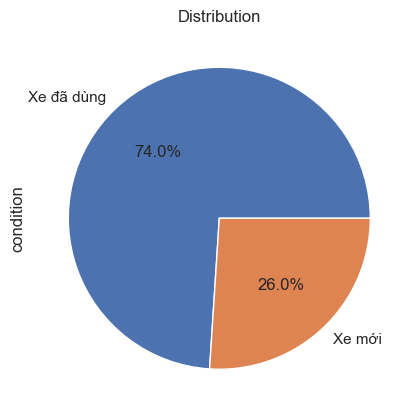

In [1194]:
plt.figure(1, figsize=(5,5), dpi = 100)
plt.title("Distribution")
data['condition'].value_counts().plot.pie(autopct="%1.1f%%")

* Biểu đồ tròn thể hiện tỉ lệ của xe đã dùng và xe mới có trong dataset
* Lượng xe đã dùng chênh lệch lớn so với xe mới
* Nhìn chung trang web chủ yếu là nơi mua bán các dòng xe đã qua sử dụng  

### Khảo sát giá xe đăng bán tại trang web

<AxesSubplot:xlabel='price', ylabel='Count'>

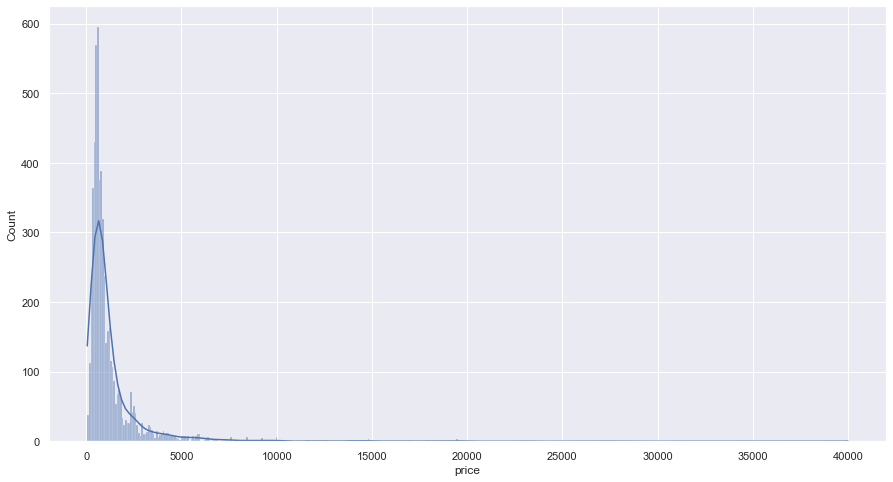

In [1195]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.histplot(data['price'],kde=True)

* Đồ thị cột thể hiện giá tiền của tất cả xe được đăng bán 
* Các xe được đăng bán tại trang web có giá thành tập trung trong khoảng < 5 tỷ
* Giá xe phổ biến nhất là từ 0.5 - 2 tỷ  

### Khảo sát giá trung bình của từng hãng, loại xe


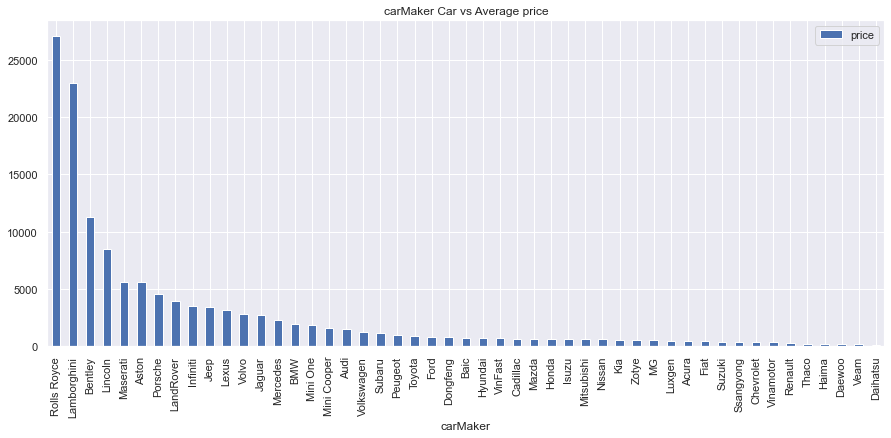

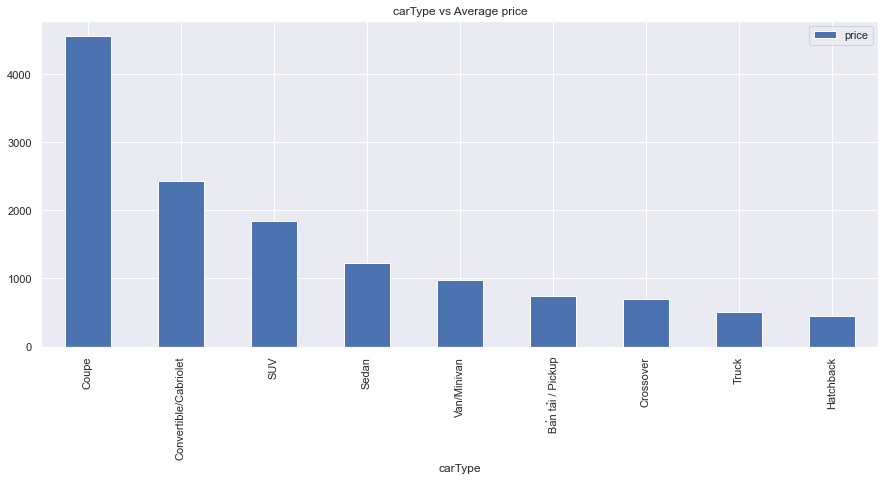

In [1196]:

df = pd.DataFrame(data.groupby(['carMaker'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('carMaker Car vs Average price')
plt.show()

df = pd.DataFrame(data.groupby(['carType'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('carType vs Average price')
plt.show()

* Đồ thị cột thể hiện mức giá trung bình theo từng hãng , loại xe. 
* Các hãng xe cao cấp như Roll Royce, Lambor, Burnley,.. có mức giá trung bình cao hơn hẳn so với các hãng khác. 
* Dòng xe coupe là dòng xe có giá trị đắt đỏ nhất

### Tương quan giữa giá tiền với dung tích động cơ và năm sản xuất 

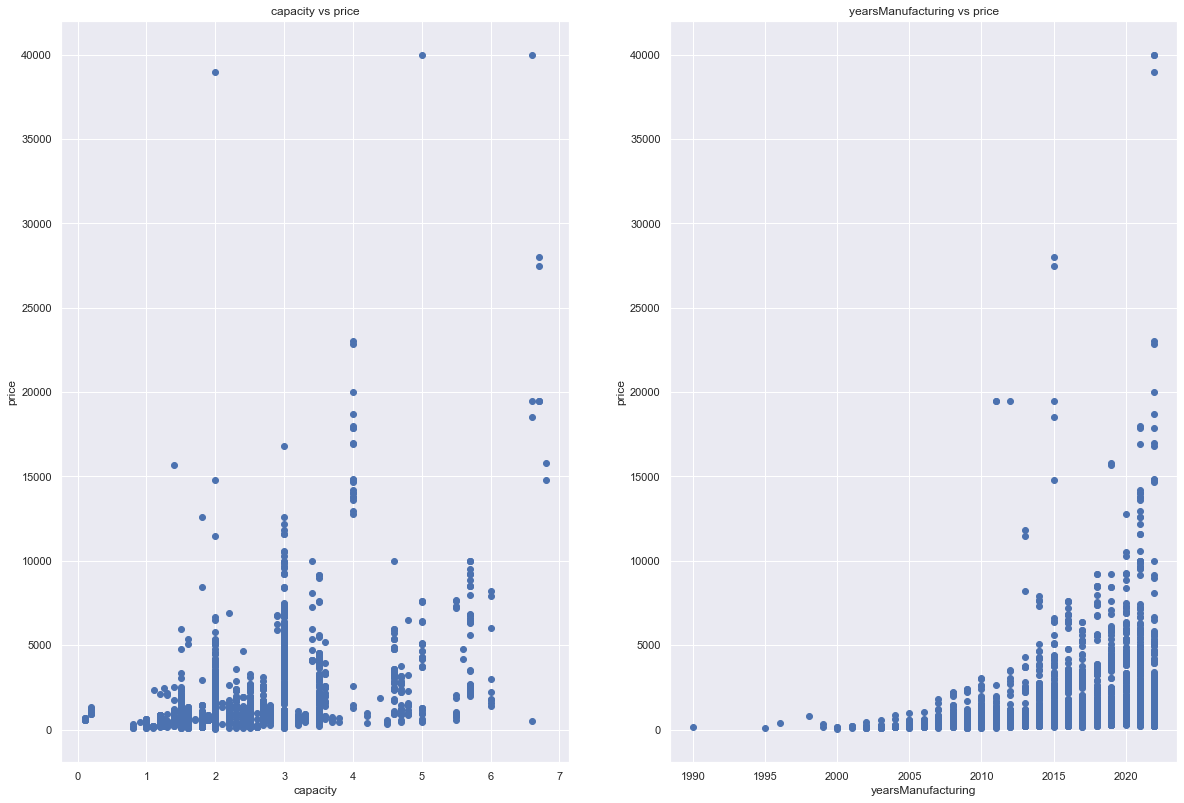

In [1197]:
def scatter(x,fig):
    plt.subplot(2,2,fig)
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs price')
    plt.ylabel('price')
    plt.xlabel(x)

plt.figure(figsize=(20,30))

scatter('capacity', 1)
scatter('yearsManufacturing', 2)

* Đồ thị phân tán thể hiện tương quan giữa giá tiền với các đặc trưng. 
* Giá bán của xe có xu hướng ngày càng tăng qua các năm
* Các dòng xe có mức giá phổ thông (< 3 tỷ) có dung tích của động cơ tập trung nhiều trong khoảng từ 1-3L 


In [1203]:
data.to_csv('data_clean.csv', index=False)